# Множества

***Множество (Set)*** — это изменяемая структура данных, которая хранит уникальные элементы в неупорядоченном виде. Множество используется для выполнения различных операций с уникальными элементами, таких как объединение, пересечение и разность. Данные в множестве хранятся с использованием хеширования, что обеспечивает быстрый доступ и проверку наличия элементов.


### Особенности множества
1. ***Хеширование элементов:*** При добавлении элемента в множество вычисляется его хеш-код с помощью функции hash(). Хеш-код используется для определения позиции элемента в памяти.
2. ***Уникальность элементов:*** Если элемент с таким же хеш-кодом уже существует, то новый элемент не добавляется, так как множество поддерживает только уникальные значения.
3. ***Неупорядоченность:*** Множество не сохраняет порядок добавления элементов. Это связано с использованием хеширования, которое определяет место хранения элементов в памяти.
4. ***Изменяемость:*** Множество можно изменять (добавлять и удалять элементы).

### Ограничения  
* Только хешируемые объекты: Множество может хранить только хешируемые объекты, такие как числа, строки и кортежи. Изменяемые объекты, такие как списки, не могут быть элементами множества.
* Неупорядоченность: Порядок элементов не сохраняется, что делает невозможным доступ по индексу.

### Создание множества  
Множество создаётся с помощью фигурных скобок с элементами или функции set().  
Важно понимать, что пустые фигурные скобки {} ***не создают множество***, так как используются для создания другого объекта.


In [ ]:
# Создание множества с помощью фигурных скобок
unique_numbers = {1, 2, 3, 4, 5}
print(unique_numbers)

# Создание пустого множества с использованием функции set()
empty_set = set()
print(empty_set)

# Ошибка: {} создаёт пустой словарь, а не множество
empty = {}
print(type(empty))


## Хешируемые объекты  
***Хеш*** — это числовое значение фиксированной длины, которое вычисляется из хешируемых объектов произвольной длины с помощью специальной хеш-функции. Хеширование используется для быстрого поиска и сравнения данных, а также для проверки целостности информации.  

***Хешируемые объекты*** — это типы данных, которые могут быть использованы в качестве ключей в хеш-таблицах или сохранены в структурах данных, использующих хеширование для сохранения и получения объектов.  

Чтобы объект считался хешируемым, он должен удовлетворять двум условиям:
1. ***Неизменность:*** Объект должен быть неизменяемым, то есть его содержимое не может быть изменено после создания. Это необходимо для того, чтобы хеш-код объекта оставался постоянным.
2. ***Наличие метода `__hash__()`***: Объект должен иметь метод для вычисления хеш-кода, который возвращает целое число, представляющее хеш-значение.


In [ ]:
# Хеш-код для строки
print(hash("hello"))
print(hash("hello"))  # Хеш-код одинаковый для одного значения
print(hash('1'))

# Хеш-код для числа
print(hash(42))
print(hash(1))
print(hash(1.0))

# Хеш-код для bool
print(hash(True))

# Хеш-код для кортежа
my_tuple = (1, 2, 3)
print(hash(my_tuple))


In [ ]:
# Списки являются изменяемыми объектами, поэтому они не поддерживают хеширование
my_list = [1, 2, 3]
# print(hash(my_list))  # Ошибка: TypeError: unhashable type: 'list'

# Поэтому нельзя создать множество со списком внутри
# my_set = {'hi', my_list}  # Ошибка: TypeError: unhashable type: 'list'
# Даже если нехешируемый объект находится внутри хешируемого
# my_set2 = {'hi', (1, my_list)}  # Ошибка: TypeError: unhashable type: 'list'


### Почему важна хешируемость?
Только хешируемые объекты могут выступать в качестве элементов в множествах, так как их хеш-код используется для быстрого доступа и проверки уникальности.


### Применение хеширования  
1. ***Хеш-таблицы:*** В Python хеширование используется для реализации таких структур данных, как множества и словари. Хеш-коды помогают быстро находить элементы в множестве, обеспечивая доступ к значению за постоянное время.  
2. ***Проверка целостности данных:*** Хеш-функции позволяют убедиться, что данные не были изменены. Например, при передаче файлов или данных по сети вычисляется хеш, который затем сравнивается на обоих концах передачи.  
3. ***Алгоритмы и структуры данных:*** Используется в алгоритмах поиска и шифрования данных, где важна быстрая обработка данных.


# Хранение множества в памяти  
Множество в Python реализовано с использованием ***хеш-таблицы***, что позволяет эффективно хранить уникальные элементы и обеспечивать быстрый доступ к ним. Это достигается благодаря хешированию, которое сопоставляет элементы с уникальными индексами (слотами) в памяти.  

### Принцип хранения и доступа:  
1. ***Хеширование элементов:*** Каждый элемент множества проходит через хеш-функцию, которая возвращает его хеш-код. Этот хеш-код используется для вычисления индекса, по которому элемент будет храниться в памяти.  
2. ***Структура хранения:*** Множество распределяет элементы по слотам в памяти на основе их хеш-кодов. Каждый слот представляет собой ячейку памяти, в которой хранится ссылка на элемент.  
3. ***Коллизии:*** В случае, если два элемента имеют одинаковый хеш-код и попадают в одну и ту же ячейку хеш-таблицы, возникает коллизия. Python использует один из методов разрешения коллизий, а именно использование цепочек (связных списков). Если возникает коллизия, новый элемент добавляется в цепочку в виде следующего элемента списка.  
4. ***Неупорядоченность элементов:*** Элементы в множестве не имеют определённого порядка, так как они распределяются по памяти в зависимости от их хеш-кодов. Это делает невозможным доступ к элементам по индексу и гарантированную последовательность элементов при итерации.  
5. ***Поиск:*** Для поиска элемента он хешируется для определения индекса слота в хеш-таблице, где может находиться данный элемент.


In [ ]:
#Пример хранения элементов:
my_set = {20, 10, 30, 40}

# Каждый элемент проходит через хеш-функцию
print(hash(20))  # Вывод хеш-кода для элемента 20
print(hash(10))  # Вывод хеш-кода для элемента 10
print(hash(30))  # Вывод хеш-кода для элемента 30
print(hash(40))  # Вывод хеш-кода для элемента 40

print(my_set)


### ПРИМЕР

Представьте, что вы продавец в маленьком магазинчике. Когда клиент покупает товары, вы проверяете их 
цену по книге. Если записи в книге не упорядочены 
по алфавиту, то поиск слова «апельсины» в каждой 
строке займет слишком много времени. 

Ваша помощница Мэгги может сообщить цену любого товара, независимо от размера книг. Она помнит все наизусть )))

Просто чудо, а не девушка! И где взять такую Мэгги? 

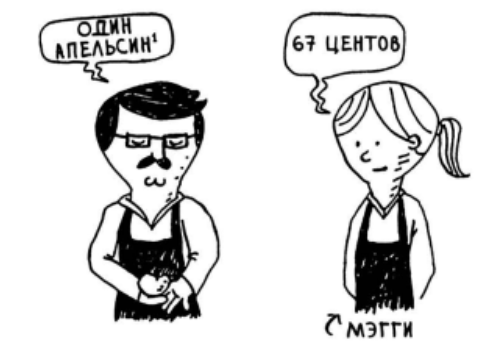

Мэгги можно реализовать программно ...

***Хеш-функция*** представляет собой функцию, которая получает строку и возвращает число:

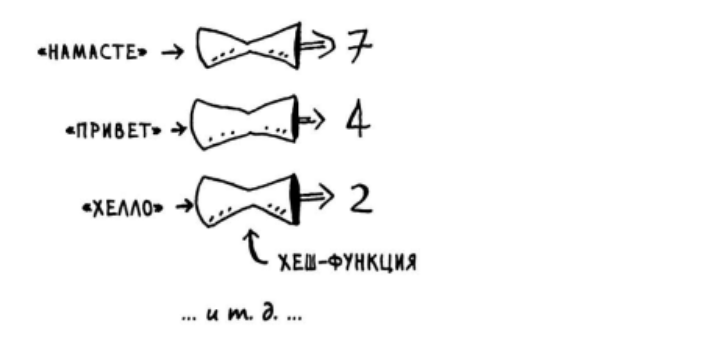

Однако хеш-функция должна соответствовать некоторым требованиям:
* Она должна быть последовательной. Допустим, вы передали ей строку «апельсины» и получили 4. Это значит, что каждый раз в будущем, передавая ей строку «апельсины», вы будете получать 4. Без этого хеш-таблица бесполезна.
* Разным словам должны соответствовать разные числа. Например, хеш-функция, которая возвращает 1 для каждого полученного слова, никуда не годится. В идеале каждое входное слово должно отображаться на свое 
число.

Зачем все это нужно? Вспомните, мы реализовываем Мэгги )))

Все цены будут храниться в этом массиве. Передадим хеш-функции строку «апельсины»

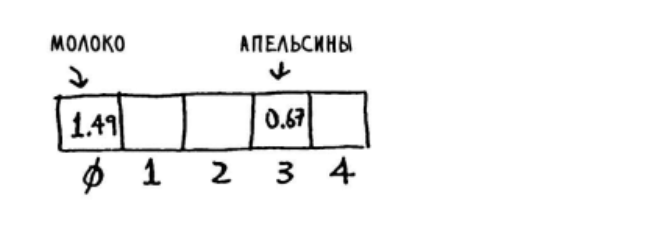

Продолжайте действовать так, и со временем весь массив будет заполнен 
ценами на товары. 

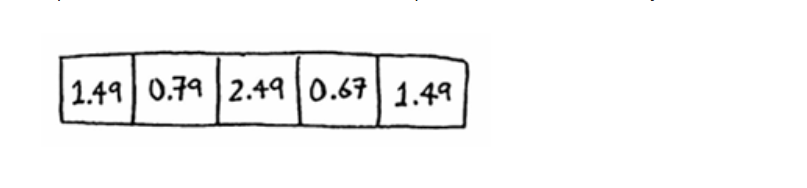

А теперь вы спрашиваете: сколько стоит авокадо? Искать в массиве ничего не нужно, просто передайте строку «авокадо» хеш-функции.

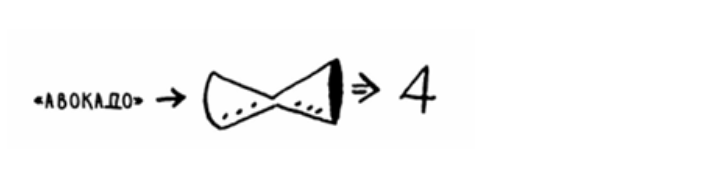

Результат показывает, что значение хранится в элементе с индексом 4. 

И оно, конечно, там и находится! 

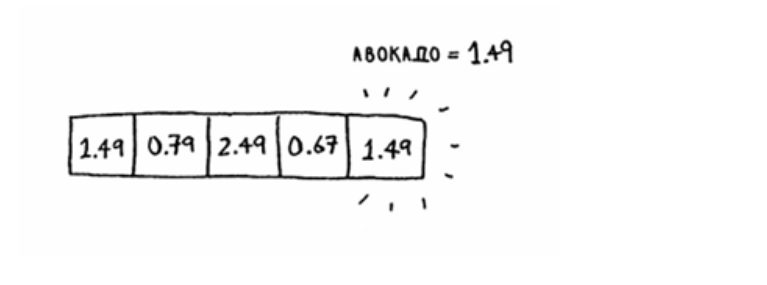

Поздравляю: вы создали Магги! Свяжите воедино хеш-функцию и массив, и вы получите структуру данных, которая называется `хеш-таблицей`. 

Хеш-таблицы станут самой полезной из сложных структур данных, с которыми вы познакомитесь. Они также известны под другими 
названиями: «ассоциативные массивы», «словари», «отображения», «хеш карты» или просто «хеши».
***Хеш-таблицы исключительно быстро работают!***

Обращение к элементу массива происходит мгновенно. 

## Преобразование в множество  
Функция set() используется для преобразования других итерируемых объектов (например, списков, строк, объекта range) в множество. Преобразование также удаляет дубликаты из коллекции, позволяя получить только уникальные элементы.

In [ ]:
# Преобразование списка
numbers = [1, 2, 2, 3, 4, 4, 5]
unique_numbers = set(numbers)
print(unique_numbers)

# Преобразование строки
text = "hello"
unique_chars = set(text)
print(unique_chars)

# Преобразование объекта range
numbers = set(range(10))
print(numbers)


### Особенности преобразования
1. Порядок элементов в результате преобразования не сохраняется, так как множества неупорядочены.
2. В множестве остаются только уникальные элементы.


In [ ]:
#1. Какие числа будут выведены при выполнении следующего кода?
my_set = {5, 10, 15, 5, 20}
print(my_set)


In [ ]:
#2. Какой результат будет выведен при выполнении следующего кода?
my_list = [1, 2, 3]
my_set = {my_list}
print(my_set)


# Методы добавления и удаления элементов
Множества в Python предоставляют удобные методы для добавления и удаления элементов. Эти методы обеспечивают гибкость и безопасность при работе с уникальными значениями.


* `add()`  
Добавляет один элемент в множество.  
`my_set.add(element)`  

* `remove()`  
Удаляет указанный элемент. Вызывает ошибку KeyError, если элемента нет.  
`my_set.remove(element)`  

* `discard()`  
Удаляет указанный элемент. Ошибки не возникает, если элемента нет.  
`my_set.discard(element)`  

* `pop()`  
Удаляет и возвращает случайный элемент. Вызывает ошибку KeyError, если множество пусто.  
`removed_element = my_set.pop()`  

* `clear()`  
Удаляет все элементы из множества, делая его пустым.  
`my_set.clear()`



### Метод add()  
* Добавляет один элемент в множество.  
* Если элемент уже существует, то изменений не происходит.


In [ ]:
my_set = {1, 2, 3}
my_set.add(4)
my_set.add(3)
print(my_set)


### Метод remove()
* Удаляет указанный элемент из множества.
* Если элемента нет в множестве, вызывается ошибка KeyError.


In [ ]:
my_set = {1, 2, 3}
my_set.remove(2)
print(my_set)
# my_set.remove(2)  # Попытка повторного удаления вызовет ошибку KeyError


### Метод discard()
* Удаляет указанный элемент, если он присутствует в множестве.
* Если элемента нет, ошибки не возникает.


In [ ]:
my_set = {1, 2, 3}
my_set.discard(2)
my_set.discard(4)  # Ошибки не будет
print(my_set)


### Метод pop()
* Удаляет и возвращает случайный элемент из множества.
* Если множество пусто, вызывается ошибка KeyError.


In [ ]:
my_set = {1, 2}
removed_element = my_set.pop()
print(removed_element)
print(my_set)  # Оставшиеся элементы
print(my_set.pop())
# print(my_set.pop())  # Вызовет ошибку KeyError, так как элементов больше нет.


### Метод clear()
* Удаляет все элементы из множества, делая его пустым.  
* Синтаксис: `my_set.clear()`
`

In [ ]:
my_set = {1, 2, 3}
my_set.clear()
print(my_set)


# Функции и операторы для множеств
Ко множествами можно применять многие встроенные функции:


`len()` — возвращает количество элементов в множестве.

In [ ]:
my_set = {1, 2, 3, 4}
print(len(my_set))


`min()` — возвращает минимальный элемент в множестве.

In [ ]:
my_set = {10, 20, 5, 8}
print(min(my_set)) 


`sum()` — возвращает сумму всех элементов в множестве.

In [ ]:
my_set = {1, 2, 3, 4}
print(sum(my_set)) 


`sorted()` — возвращает отсортированный список элементов множества.

In [ ]:
my_set = {3, 1, 4, 2}
print(sorted(my_set)) 


In [ ]:
А также операторы вхождения:

Оператор `in`:  
Проверяет, содержит ли множество определённый элемент.


In [ ]:
my_set = {1, 2, 3}
print(2 in my_set)
print(4 in my_set)

Оператор `not in:`  
Проверяет, отсутствует ли элемент в множестве.


In [ ]:
my_set = {1, 2, 3}
print(4 not in my_set)

In [ ]:
#1. Какой результат будет выведен при выполнении следующего кода?
my_set = {1, 2, 3}
my_set.add(3)
print(my_set)


In [ ]:
#2. Какой результат будет выведен при выполнении следующего кода?
my_set = {1, 2, 3}
my_set.remove(0)

## Операции над множествами  
В Python операции с множествами можно выполнять с помощью операторов и методов. Операции с множествами в Python позволяют эффективно выполнять различные задачи, связанные с обработкой и анализом данных.


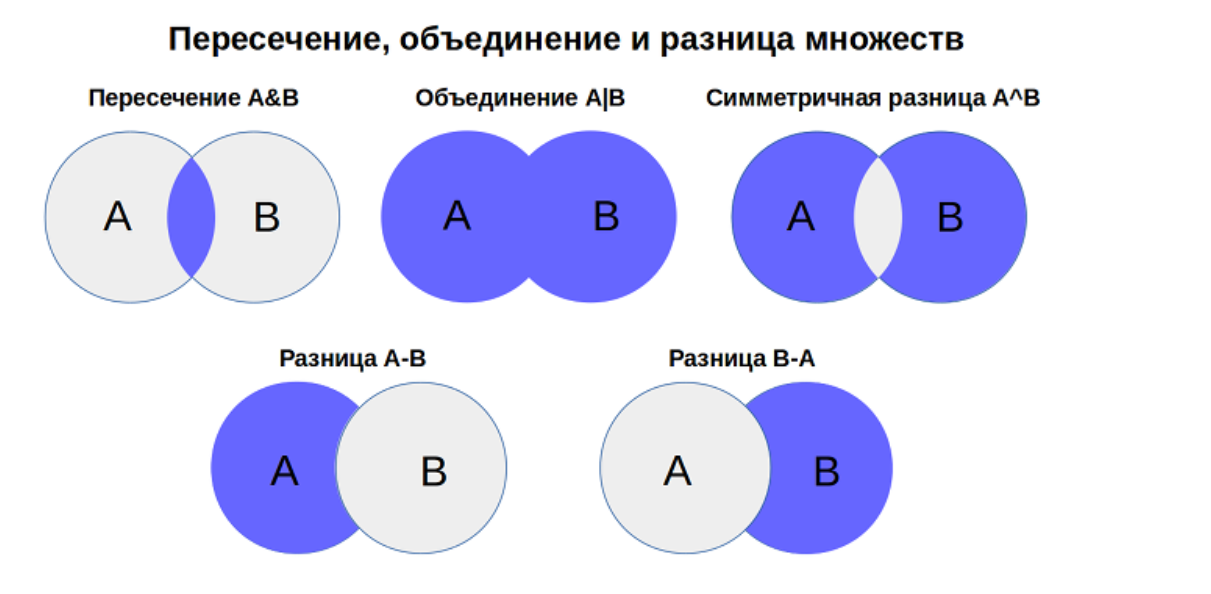

### Виды операций  
Методы, представляющие эти операции, делятся на изменяющие и неизменяющие. Изменяющие методы модифицируют исходное множество, в то время как неизменяющие создают новое множество и не изменяют оригинал. Кроме того неизменяющие методы можно заменить операторами.

1. #### Объединение множеств:
* Объединяет элементы двух множеств, возвращая новое множество с уникальными элементами из обоих множеств.  
* Оператор: `|`  
* Методы:  
   * Неизменяющий: `.union()` — создаёт новое множество.  
   * Изменяющий: `.update()` — изменяет исходное множество.

In [ ]:
set1 = {1, 2, 3}
set2 = {3, 4, 5}

result1 = set1.union(set2)  # Неизменяющий метод
result2 = set1 | set2  # Использование оператора
print(result1)
print(result2)
print(set1)

set1.update(set2)  # Изменяющий метод
print(set1)


2. #### Пересечение множеств:
* Возвращает множество, содержащее элементы, которые присутствуют в обоих множествах.
* Оператор: `&`
* Методы:
   * Неизменяющий: `.intersection()`  
   * Изменяющий: `.intersection_update()`

In [ ]:
set1 = {1, 2, 3}
set2 = {2, 3, 4}
result1 = set1.intersection(set2)  # Неизменяющий метод
result2 = set1 & set2  # Использование оператора
print(result1)
print(result2)
print(set1)

set1.intersection_update(set2)  # Изменяющий метод
print(set1)


3. #### Разность множеств:
* Возвращает новое множество, содержащее элементы, которые есть в первом множестве, но отсутствуют во втором.
* Оператор: `-`  
* Методы:  
   * Неизменяющий: `.difference()`
   * Изменяющий: `.difference_update()`

In [ ]:
set1 = {1, 2, 3}
set2 = {2, 3, 4}
result1 = set1.difference(set2)  # Неизменяющий метод
result2 = set1 - set2  # Использование оператора
print(result1)
print(result2)
print(set1)

set1.difference_update(set2)  # Изменяющий метод
print(set1)


4. #### Симметрическая разность:
* Возвращает новое множество, содержащее элементы, которые присутствуют в одном из множеств, но не в обоих одновременно.
* Оператор: `^`
* Методы:
   * Неизменяющий: `.symmetric_difference()`
   * Изменяющий: `.symmetric_difference_update()`

In [ ]:
set1 = {1, 2, 3}
set2 = {2, 3, 4}
result1 = set1.symmetric_difference(set2)  # Неизменяющий метод
result2 = set1 ^ set2  # Использование оператора
print(result1)
print(result2)
print(set1)

set1.symmetric_difference_update(set2)  # Изменяющий метод
print(set1)


In [ ]:
data_scientist_skills = set(['Python', 'R', 'SQL', 'Tableau', 'SAS', 'Git'])
data_engineer_skills = set(['Python', 'Java', 'Scala', 'Git', 'SQL', 'Hadoop'])

In [ ]:
# логическое ИЛИ – что нужно знать data-scientst, который по совместительству data-engineer
print(data_scientist_skills.union(data_engineer_skills))
print(data_scientist_skills | data_engineer_skills)


In [ ]:
# логическое ИЛИ – что нужно знать data-scientst, который по совместительству data-engineer
print(data_scientist_skills.union(data_engineer_skills))
print(data_scientist_skills | data_engineer_skills)

In [ ]:
# разность множеств – что знает data-scientist, но не знает data-engineer (и наоборот)
# print(data_scientist_skills.difference(data_engineer_skills))
# print(data_scientist_skills - data_engineer_skills)
print(data_engineer_skills.difference(data_scientist_skills))
print(data_engineer_skills - data_scientist_skills)

In [ ]:
# симметричная разность множеств – что такого знают data-scientist и data-engineer, чего не знают они оба
# print(data_scientist_skills.symmetric_difference(data_engineer_skills))
# print(data_scientist_skills ^ data_engineer_skills)
print(data_engineer_skills.symmetric_difference(data_scientist_skills))
print(data_engineer_skills ^ data_scientist_skills)

In [ ]:
#1. Какой результат будет выведен при выполнении следующего кода?
set1 = {1, 2, 3}
set2 = {3, 4, 5}
result = set1 | set2
print(result)


In [ ]:
#3. Какой результат будет выведен при выполнении следующего кода?
set1 = {10, 20, 30}
set2 = {20, 30, 40}
result = set1 - set2
print(result)


# Отношения между множествами
Python предоставляет операторы и методы для определения отношений между множествами, таких как подмножества, надмножества и равенство. Эти операции помогают сравнивать множества.


1. #### Подмножество:
* Проверяет, содержит ли одно множество все элементы другого множества.
* Операторы: `<=` (подмножество), `<` (строгое подмножество)
   * Метод: `.issubset()` - эквивалентен `<=`

In [ ]:
set1 = {1, 2, 3}
set2 = {1, 2}
set3 = {1, 2, 3}
print(set1 <= set2)
print(set2 <= set1)
print(set2 < set1)
print(set1.issubset(set3))


2. #### Надмножество:
* Проверяет, содержит ли одно множество другое множество целиком.
* Операторы: `>=` (надмножество), `>` (строгое надмножество)
   * Метод: `.issuperset()` - эквивалентен `>=`

In [ ]:
set1 = {1, 2, 3}
set2 = {1, 2}
set3 = {1, 2, 3}
print(set1 >= set2)
print(set2 >= set1)
print(set1 > set3)
print(set1.issuperset(set3))


3. #### Равенство множеств:
* Проверяет, содержат ли два множества одни и те же элементы.
   * Оператор: `==`

In [ ]:
set1 = {1, 2, 3}
set2 = {3, 2, 1}
print(set1 == set2)


4. #### Неравенство множеств:
* Проверяет, содержат ли два множества разные элементы.
   * Оператор: `!=`

In [ ]:
set1 = {1, 2, 3}
set2 = {4, 5, 6}
print(set1 != set2)


5. #### Отсутствие пересечений:
* Проверяет, не имеют ли два множества общих элементов.
   * Метод: `.isdisjoint()`

In [ ]:
set1 = {1, 2}
set2 = {3, 4}
set3 = {2, 3}
print(set1.isdisjoint(set2))
print(set1.isdisjoint(set3))


## Цикл по множеству
В Python можно использовать цикл for для перебора элементов множества. Поскольку множество — это неупорядоченная коллекция уникальных элементов, порядок их обхода в цикле не гарантируется и может отличаться при каждом запуске программы.


In [ ]:
my_set = {10, 20, 30, 40, 50}

for item in my_set:
    print(item)


In [ ]:
# 1. Что будет выведено при выполнении следующего кода?
set1 = {1, 2, 3}
set2 = {1, 2}
print(set2.issubset(set1))


In [ ]:
#2. Что будет выведено при выполнении следующего кода?
set1 = {5, 6, 7}
set2 = {8, 9, 10}
print(set1.isdisjoint(set2))


In [ ]:
#3. Какой результат будет выведен при выполнении следующего кода?
set1 = {1, 2, 3}
set2 = {3, 4, 5}
print(set2 >= set1)


## Практические задания
1. Напишите программу, которая создает множество из всех уникальных символов строки, за исключением пробелов.  
Данные:  
`text = "hello world"`  

Пример вывода:  
Уникальные символы: `{'o', 'r', 'e', 'w', 'h', 'd', 'l'}`


In [ ]:
text = "hello world"
unique_chars = set(text)

unique_chars.discard(" ")

print("Уникальные символы:", unique_chars)

2. Напишите программу, которая принимает два списка чисел и выводит множество, содержащее элементы, которые присутствуют в обоих списках.  
Данные:  
`list1 = [1, 2, 3, 4, 5]`  
`list2 = [3, 4, 5, 6, 7]`  
Пример вывода:  
Элементы в обоих списках: `{3, 4, 5}`  


In [ ]:
list1 = [1, 2, 3, 4, 5]
list2 = [3, 4, 5, 6, 7]
intersection = set(list1) & set(list2)
print("Пересечение:", intersection)


### Полезные материалы
1. Множества (set и frozenset) ​​https://pythonworld.ru/tipy-dannyx-v-python/mnozhestva-set-i-frozenset.html 
2. Хэш-таблицы за 10 минут https://youtu.be/0UX4MIfOMEs

### Вопросы для закрепления
1. Что такое множество и как оно реализовано внутри
2. Какие операции из теории множеств вы помните?
3. Для каких операций список эффективнее множества как коллекция элементов?